In [116]:
import numpy
import pandas
import numpy as np
pd = pandas

In [117]:
passing_data = pandas.read_csv("./2020_Problem_D_DATA/passingevents.csv")

In [118]:
passing_data.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0


# Centroid coordinates and dispersion

## long

In [119]:
passing_data

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
23424,38,Opponent14,Opponent14_M3,Opponent14_D1,2H,2758.973892,Simple pass,57,56,65.0,63.0
23425,38,Opponent14,Opponent14_D1,Opponent14_D6,2H,2760.286946,Simple pass,65,63,61.0,96.0
23426,38,Opponent14,Opponent14_D6,Opponent14_M4,2H,2763.698599,Simple pass,61,96,40.0,85.0
23427,38,Opponent14,Opponent14_M4,Opponent14_M2,2H,2783.137836,Simple pass,59,70,53.0,89.0


In [120]:
ppd = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'EventOrigin_x', 'EventOrigin_y']]
ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [121]:
X_mean, Y_mean = ppd[['EventOrigin_x', 'EventOrigin_y']].mean()

In [122]:
pomd = ppd.groupby('OriginPlayerID').mean()

In [123]:
pomd['distance'] = [((x - X_mean)**2 + (y - Y_mean)**2)**0.5 for x,y in zip(pomd['EventOrigin_x'],pomd['EventOrigin_y'])]

In [124]:
pomd

,EventOrigin_x,EventOrigin_y,distance
OriginPlayerID,,,
Huskies_D1,34.297297,54.083431,13.485088
Huskies_D10,37.184211,21.973684,29.489998
Huskies_D2,34.743103,45.163793,13.154692
Huskies_D3,35.467675,51.566713,11.742218
Huskies_D4,50.718805,12.525483,37.410368
Huskies_D5,48.324800,34.862400,14.947839
Huskies_D6,39.319876,75.639752,27.017638
Huskies_D7,51.115196,82.735294,33.225057
Huskies_D8,51.996198,86.798479,37.367211


In [125]:
pomd.std()[2]

10.178254872596563

In [126]:
centroid_coordinates_and_dispersion = pd.DataFrame({'Centroid coordinates':[(X_mean, Y_mean)], 'dispersion':pomd.std()[2]})

In [127]:
centroid_coordinates_and_dispersion.to_csv("centroid_coordinates_and_dispersion.csv")

# Clustering coefficient

## long

In [128]:
pure_passing_data = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'DestinationPlayerID']]
ppd = pure_passing_data

In [129]:
ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [130]:
ppd['count'] = 1
ppd = ppd.groupby(['OriginPlayerID', 'DestinationPlayerID']).sum()

In [131]:
ppd

count
OriginPlayerID DestinationPlayerID       
Huskies_D1     Huskies_D1               2
               Huskies_D10              2
               Huskies_D2              59
               Huskies_D3             105
               Huskies_D4              73
...                                   ...
Huskies_M9     Huskies_M13              5
               Huskies_M3               8
               Huskies_M4               6
               Huskies_M6              15
               Huskies_M8               2

[656 rows x 1 columns]

In [132]:
ppd = ppd.sort_values(by='count').ix[::-1]

In [133]:
temple_ppd = ppd.copy()
max_count = max(temple_ppd['count'])
temple_ppd['count'] = temple_ppd['count'] / max_count
temple_ppd

,,count
OriginPlayerID,DestinationPlayerID,
Huskies_M1,Huskies_F2,1.000000
Huskies_M3,Huskies_M1,0.923077
Huskies_M1,Huskies_M3,0.785714
Huskies_D3,Huskies_G1,0.659341
Huskies_F2,Huskies_M1,0.642857
...,...,...
Huskies_F5,Huskies_F5,0.005495
Huskies_D3,Huskies_M10,0.005495
Huskies_F5,Huskies_D6,0.005495


In [134]:
# d1 = d0.copy()
# d2 = d0.copy()

In [135]:
d0 = temple_ppd.copy()
d0 = pandas.DataFrame({'i': list(map(lambda x: x[0], d0.index)), 'j': list(map(lambda x: x[1], d0.index)), 'count':d0.to_numpy().T[0]})
d1 = d0.copy()
d2 = d0.copy()

In [136]:
d1 = d1.rename(columns={'i':'j', "j":'k'})
d2 = d2.rename(columns={'i':'k', "j":'i'})

In [137]:
d1

,j,k,count
0,Huskies_M1,Huskies_F2,1.000000
1,Huskies_M3,Huskies_M1,0.923077
2,Huskies_M1,Huskies_M3,0.785714
3,Huskies_D3,Huskies_G1,0.659341
4,Huskies_F2,Huskies_M1,0.642857
...,...,...,...
651,Huskies_F5,Huskies_F5,0.005495
652,Huskies_D3,Huskies_M10,0.005495
653,Huskies_F5,Huskies_D6,0.005495
654,Huskies_F5,Huskies_D3,0.005495


In [138]:
merged_data = pd.merge(pd.merge(d0, d1, on='j'), d2, on=['k', 'i'])
md = merged_data
md

,i,j,count_x,k,count_y,count
0,Huskies_M1,Huskies_F2,1.000000,Huskies_M1,0.642857,0.038462
1,Huskies_M1,Huskies_M1,0.038462,Huskies_M1,0.038462,0.038462
2,Huskies_M1,Huskies_M3,0.785714,Huskies_M1,0.923077,0.038462
3,Huskies_M1,Huskies_G1,0.109890,Huskies_M1,0.131868,0.038462
4,Huskies_M1,Huskies_D3,0.329670,Huskies_M1,0.258242,0.038462
...,...,...,...,...,...,...
12553,Huskies_M10,Huskies_D7,0.049451,Huskies_M1,0.269231,0.043956
12554,Huskies_M10,Huskies_D6,0.005495,Huskies_M1,0.175824,0.043956
12555,Huskies_M10,Huskies_F4,0.016484,Huskies_M1,0.082418,0.043956
12556,Huskies_M10,Huskies_M9,0.005495,Huskies_M1,0.060440,0.043956


In [139]:
md = md.rename(columns={'count_x':'wij', 'count_y':'wjk', 'count':'wki'})

In [140]:
md

,i,j,wij,k,wjk,wki
0,Huskies_M1,Huskies_F2,1.000000,Huskies_M1,0.642857,0.038462
1,Huskies_M1,Huskies_M1,0.038462,Huskies_M1,0.038462,0.038462
2,Huskies_M1,Huskies_M3,0.785714,Huskies_M1,0.923077,0.038462
3,Huskies_M1,Huskies_G1,0.109890,Huskies_M1,0.131868,0.038462
4,Huskies_M1,Huskies_D3,0.329670,Huskies_M1,0.258242,0.038462
...,...,...,...,...,...,...
12553,Huskies_M10,Huskies_D7,0.049451,Huskies_M1,0.269231,0.043956
12554,Huskies_M10,Huskies_D6,0.005495,Huskies_M1,0.175824,0.043956
12555,Huskies_M10,Huskies_F4,0.016484,Huskies_M1,0.082418,0.043956
12556,Huskies_M10,Huskies_M9,0.005495,Huskies_M1,0.060440,0.043956


In [141]:
md['www'] = [(wij * wjk * wki) for wij, wjk, wki in zip(md['wij'], md['wjk'], md['wki'])]
md['ww'] = [(wij * wki) for wij, wki in zip(md['wij'], md['wki'])]

In [142]:
md = md.groupby('i').sum()

In [143]:
md['Clustering coefficient'] = [www/ww for www,ww in zip(md['www'], md['ww'])]
md = md.sort_values(by='Clustering coefficient').ix[::-1]
md

,wij,wjk,wki,www,ww,Clustering coefficient
i,,,,,,
Huskies_D10,1.626374,14.620879,1.434066,0.008216,0.034114,0.240830
Huskies_M7,0.840659,12.983516,0.884615,0.002767,0.011925,0.232021
Huskies_M2,6.351648,36.434066,6.137363,0.033407,0.151220,0.220918
Huskies_D2,74.692308,53.565934,63.785714,1.715930,7.803587,0.219890
Huskies_D9,3.016484,22.736264,2.593407,0.014573,0.066327,0.219710
Huskies_F3,5.307692,40.291209,6.054945,0.025786,0.118856,0.216949
Huskies_D5,85.269231,53.445055,77.972527,2.216511,10.414231,0.212835
Huskies_M3,117.005495,48.093407,97.252747,3.790687,18.212927,0.208132
Huskies_D4,70.725275,48.670330,73.527473,2.056800,9.912299,0.207500


In [144]:
md.to_csv('Clustering coefficient.csv')

# Largest eigenvalue of the adjacency matrix

## long

In [145]:
# pure_passing_data = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'DestinationPlayerID']]
# ppd = pure_passing_data
# ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [146]:
ppd = d0.copy() # 使用上一章的d0数据

In [147]:
players = list(set(ppd['i']))
players = sorted(players)
players

['Huskies_D1',
 'Huskies_D10',
 'Huskies_D2',
 'Huskies_D3',
 'Huskies_D4',
 'Huskies_D5',
 'Huskies_D6',
 'Huskies_D7',
 'Huskies_D8',
 'Huskies_D9',
 'Huskies_F1',
 'Huskies_F2',
 'Huskies_F3',
 'Huskies_F4',
 'Huskies_F5',
 'Huskies_F6',
 'Huskies_G1',
 'Huskies_M1',
 'Huskies_M10',
 'Huskies_M11',
 'Huskies_M12',
 'Huskies_M13',
 'Huskies_M2',
 'Huskies_M3',
 'Huskies_M4',
 'Huskies_M5',
 'Huskies_M6',
 'Huskies_M7',
 'Huskies_M8',
 'Huskies_M9']

In [148]:
import numpy as np

In [149]:
mat = np.zeros((30, 30))

In [150]:
for i, iplayer in enumerate(players):
    for j, jplayer in enumerate(players):
        qr = ppd[ppd['i']==iplayer][ppd['j']==jplayer].to_numpy()
        if len(qr) > 0:
            mat[i][j] = qr[-1][-1]
        else:
            mat[i][j] = 0

In [151]:
A = mat
A

array([[0.01098901, 0.01098901, 0.32417582, 0.57692308, 0.4010989 ,
        0.31318681, 0.13736264, 0.18681319, 0.12637363, 0.03296703,
        0.12637363, 0.26923077, 0.02747253, 0.1043956 , 0.1043956 ,
        0.0989011 , 0.58791209, 0.50549451, 0.01098901, 0.01098901,
        0.07142857, 0.01098901, 0.01648352, 0.28021978, 0.14285714,
        0.        , 0.11538462, 0.02197802, 0.01648352, 0.03296703],
       [0.00549451, 0.        , 0.        , 0.05494505, 0.04395604,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00549451,
        0.01098901, 0.03296703, 0.01648352, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02747253, 0.01098901,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.34065934, 0.        , 0.01098901, 0.26923077, 0.21428571,
        0.25824176, 0.28571429, 0.14285714, 0.01098901, 0.04395604,
        0.07142857, 0.30769231, 0.00549451, 0.

In [152]:
eigenvalue, eigenvector = np.linalg.eig(mat)

In [153]:
eigenvalue

array([ 3.27062996e+00+0.j        , -1.02746722e+00+0.j        ,
        5.81904689e-01+0.j        , -6.20333252e-01+0.07527293j,
       -6.20333252e-01-0.07527293j, -4.95032629e-01+0.j        ,
        3.30961715e-01+0.j        ,  2.83322813e-01+0.j        ,
       -3.84472141e-01+0.j        , -3.56775461e-01+0.j        ,
       -3.01521204e-01+0.j        , -2.38580393e-01+0.j        ,
       -1.73969041e-01+0.j        ,  1.23656925e-01+0.02468437j,
        1.23656925e-01-0.02468437j, -1.34819049e-01+0.j        ,
       -7.06153249e-02+0.j        ,  3.56651079e-02+0.02155405j,
        3.56651079e-02-0.02155405j, -3.84048821e-02+0.j        ,
       -3.19988160e-02+0.j        ,  2.89166875e-02+0.j        ,
       -1.02910503e-02+0.00901127j, -1.02910503e-02-0.00901127j,
        1.38705134e-02+0.00354269j,  1.38705134e-02-0.00354269j,
       -9.78583409e-03+0.j        , -6.93246961e-04+0.00102322j,
       -6.93246961e-04-0.00102322j,  2.63745327e-03+0.j        ])

In [154]:
lec = max(eigenvalue)
lec

(3.270629961991124+0j)

In [155]:
eigenvector

,
       [-2.35513875e-02+0.00000000e+00j,  5.87830983e-03+0.00000000e+00j,
         4.33088879e-02+0.00000000e+00j,  1.02189437e-02-7.10935658e-03j,
         1.02189437e-02+7.10935658e-03j, -1.46696018e-02+0.00000000e+00j,
        -4.09827540e-02+0.00000000e+00j, -9.55832450e-03+0.00000000e+00j,
         6.00773029e-02+0.00000000e+00j,  4.28615925e-02+0.00000000e+00j,
         5.81280233e-02+0.00000000e+00j,  9.66934695e-04+0.00000000e+00j,
        -8.23868194e-02+0.00000000e+00j, -8.00302011e-02-2.25897754e-02j,
        -8.00302011e-02+2.25897754e-02j,  4.44089614e-02+0.00000000e+00j,
        -1.83829043e-01+0.00000000e+00j, -1.21914182e-01+1.16588221e-02j,
        -1.21914182e-01-1.16588221e-02j, -3.44257582e-01+0.00000000e+00j,
         1.31268469e-01+0.00000000e+00j, -6.18527597e-02+0.00000000e+00j,
         4.56944941e-01+0.00000000e+00j,  4.56944941e-01-0.00000000e+00j,
        -2.03775587e-01-8.96180935e-02j, -2.03775587e-01+8.96180935e-02j,
        -5.11504289e-01+0.00000000e+

In [156]:
pd.DataFrame({'Largest eigenvalue':[lec]}).to_csv('Largest eigenvalue.csv')

# Algebraic connectivity

## long

In [157]:
S = np.zeros((30, 30))

In [158]:
for i, line in enumerate(A):
    S[i][i] = sum(line)

In [159]:
S

array([[4.67582418, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.20879121, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 3.18681319, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [160]:
L = S - A

In [161]:
L

array([[ 4.66483516e+00, -1.09890110e-02, -3.24175824e-01,
        -5.76923077e-01, -4.01098901e-01, -3.13186813e-01,
        -1.37362637e-01, -1.86813187e-01, -1.26373626e-01,
        -3.29670330e-02, -1.26373626e-01, -2.69230769e-01,
        -2.74725275e-02, -1.04395604e-01, -1.04395604e-01,
        -9.89010989e-02, -5.87912088e-01, -5.05494505e-01,
        -1.09890110e-02, -1.09890110e-02, -7.14285714e-02,
        -1.09890110e-02, -1.64835165e-02, -2.80219780e-01,
        -1.42857143e-01,  0.00000000e+00, -1.15384615e-01,
        -2.19780220e-02, -1.64835165e-02, -3.29670330e-02],
       [-5.49450549e-03,  2.08791209e-01,  0.00000000e+00,
        -5.49450549e-02, -4.39560440e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -5.49450549e-03,
        -1.09890110e-02, -3.29670330e-02, -1.64835165e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [162]:
eigenvalueL, eigenvectorL = np.linalg.eig(L)

In [163]:
sorted(eigenvalueL)[1]

0.12284766857916317

In [164]:
pd.DataFrame({'Algebraic connectivity':[sorted(eigenvalueL)[1]]}).to_csv('Algebraic connectivity.csv')

# Eigenvector centrality

## long

In [165]:
# 不确定
eigenvector[list(eigenvalue).index(lec)]

array([-0.33010464+0.j        , -0.31268098+0.j        ,
       -0.43077116+0.j        , -0.47352017+0.j        ,
       -0.47352017-0.j        ,  0.08493998+0.j        ,
       -0.02137547+0.j        , -0.08662863+0.j        ,
       -0.00382151+0.j        , -0.03633349+0.j        ,
        0.01991632+0.j        , -0.01547523+0.j        ,
       -0.00490323+0.j        ,  0.02945663+0.02786254j,
        0.02945663-0.02786254j,  0.15013052+0.j        ,
        0.08543584+0.j        ,  0.0314515 -0.02737969j,
        0.0314515 +0.02737969j, -0.00223783+0.j        ,
       -0.00182912+0.j        ,  0.01179496+0.j        ,
        0.02187388-0.02626778j,  0.02187388+0.02626778j,
       -0.00181397+0.00263451j, -0.00181397-0.00263451j,
       -0.00086742+0.j        , -0.05481535+0.00292738j,
       -0.05481535-0.00292738j,  0.02942713+0.j        ])

In [166]:
import networkx as nx

In [167]:
G = nx.Graph()

In [168]:
for i, p in enumerate(players):
    G.add_node(i)

In [169]:
for i in range(len(players)):
    for j in range(len(players)):
        G.add_edge(i, j, weight=A[i][j])

In [170]:
ec = nx.eigenvector_centrality_numpy(G, weight='weight')
ec

{0: 0.2894454092689097,
 1: 0.013022076702967058,
 2: 0.20433795812148856,
 3: 0.2351470748173572,
 4: 0.24659462421217054,
 5: 0.24116325821567192,
 6: 0.1290263410016456,
 7: 0.16113371486038722,
 8: 0.11843981694665608,
 9: 0.019270316169416435,
 10: 0.12598847135454483,
 11: 0.38205619397525115,
 12: 0.029056229502344124,
 13: 0.06996136720791674,
 14: 0.061861919176655136,
 15: 0.08750822336684856,
 16: 0.15068608748323847,
 17: 0.47433987368668856,
 18: 0.013998726397280042,
 19: 0.02056736818956702,
 20: 0.06424203789993317,
 21: 0.02464884163629697,
 22: 0.026074355853304587,
 23: 0.3624654438954662,
 24: 0.19322629765676097,
 25: 0.014684819013918323,
 26: 0.19010577083963337,
 27: 0.010264625171988727,
 28: 0.053818049537297526,
 29: 0.046336413824009916}

In [171]:
ps = []
vs = []
for p, v in ec.items():
    ps.append(p)
    vs.append(v)

In [172]:
max_ec = max(vs)
player_with_ec = ps[vs.index(max_ec)]

In [173]:
dispersion_ec = np.var(vs)

In [174]:
pd.DataFrame({'player':ps, 'Eigenvector centrality':vs,
    'max':max_ec, 'player with max':player_with_ec, 'dispersion':dispersion_ec}).to_csv('Eigenvector centrality.csv')

# triadic configurations

## long

In [175]:
from itertools import combinations, permutations

In [176]:
triples = combinations(players, 3)

In [177]:
triples = list(triples)
triples

', 'Huskies_D8', 'Huskies_M11'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M12'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M13'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M2'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M3'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M4'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M5'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M6'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M7'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M8'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M9'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F2'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F3'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F4'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F5'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F6'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_G1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M10'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M11'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M12

In [178]:
all_edges = [(x, y) for x,y in zip(ppd.i, ppd.j)]

In [179]:
triangles = []

for a, b, c in triples:
    if ((a,b) in all_edges or (b,a) in all_edges) and ((a,c) in all_edges or (c,a) in all_edges) and ((b,c) in all_edges or (c,b) in all_edges):
        triangles.append((a,b,c))

In [180]:
len(triangles)

2263

# triadic configurations value

## long

In [181]:
values = [0] * len(triangles)

In [182]:
for i, t in enumerate(triangles):
    edges = list(permutations(t, 2))
    for e in edges:
        qr = ppd[ppd.i == e[0]][ppd.j == e[1]].to_numpy()
        if len(qr) > 0:
            values[i] += qr[-1][-1]

In [183]:
tvd = pd.DataFrame({'triangle':triangles, 'value':values})

In [184]:
tvd = tvd.sort_values(by='value').ix[::-1]
tvd

,triangle,value
1876,"(Huskies_F2, Huskies_M1, Huskies_M3)",4.016484
1150,"(Huskies_D5, Huskies_F2, Huskies_M1)",3.483516
267,"(Huskies_D1, Huskies_M1, Huskies_M3)",3.368132
1024,"(Huskies_D4, Huskies_M1, Huskies_M3)",3.313187
1222,"(Huskies_D5, Huskies_M1, Huskies_M3)",3.302198
...,...,...
2233,"(Huskies_M12, Huskies_M8, Huskies_M9)",0.032967
2156,"(Huskies_G1, Huskies_M5, Huskies_M9)",0.032967
584,"(Huskies_D2, Huskies_M10, Huskies_M8)",0.027473
892,"(Huskies_D4, Huskies_D6, Huskies_M10)",0.021978


In [185]:
max_value = max(tvd.value)

In [186]:
pd.DataFrame({'amount':[len(triangles)], 'max value':[max_value]}).to_csv('triadic configurations.csv')

# team formationteam formation

In [187]:
threshold = max_value / 2

In [188]:
triangles_filtered = tvd[tvd['value'] >= threshold]
tfd = triangles_filtered

In [189]:
tfd

,triangle,value
1876,"(Huskies_F2, Huskies_M1, Huskies_M3)",4.016484
1150,"(Huskies_D5, Huskies_F2, Huskies_M1)",3.483516
267,"(Huskies_D1, Huskies_M1, Huskies_M3)",3.368132
1024,"(Huskies_D4, Huskies_M1, Huskies_M3)",3.313187
1222,"(Huskies_D5, Huskies_M1, Huskies_M3)",3.302198
193,"(Huskies_D1, Huskies_F2, Huskies_M1)",3.186813
956,"(Huskies_D4, Huskies_F2, Huskies_M1)",3.131868
46,"(Huskies_D1, Huskies_D3, Huskies_G1)",3.049451
1877,"(Huskies_F2, Huskies_M1, Huskies_M4)",2.978022
1879,"(Huskies_F2, Huskies_M1, Huskies_M6)",2.967033


In [190]:
# def count_shared_edge(t0, t1):
#     num_shared_node = len(set(t0) & set(t1))
#     if num_shared_node <= 1:
#         return 0
#     elif num_shared_node == 2:

def count_shared_node(t0, t1):
    return len(set(t0) & set(t1)) 

In [191]:
tf = list(tfd.triangle.to_numpy())

In [192]:
pairs = combinations(tf, 2)
pairs = list(pairs)
len(pairs)

1225

In [193]:
weight = [count_shared_node(t0, t1)*(tvd[tvd.triangle==t0].value.to_numpy()[0]+tvd[tvd.triangle==t1].value.to_numpy()[0])/2 for t0, t1 in pairs]

In [194]:
# for t0, t1 in pairs:
#     print(tvd[tvd.triangle==t0].value, tvd[tvd.triangle==t1].value)

# tvd[tvd.triangle==pairs[0][0]].value.to_numpy()[0]
weight

[7.5,
 7.384615384615384,
 7.329670329670329,
 7.318681318681318,
 7.2032967032967035,
 7.148351648351649,
 0.0,
 6.9945054945054945,
 6.983516483516484,
 6.917582417582418,
 6.84065934065934,
 6.829670329670329,
 6.818681318681318,
 6.802197802197802,
 6.747252747252747,
 6.736263736263736,
 3.3461538461538463,
 6.648351648351648,
 6.516483516483516,
 6.510989010989011,
 3.239010989010989,
 3.2115384615384617,
 6.423076923076923,
 3.186813186813187,
 0.0,
 6.362637362637363,
 3.173076923076923,
 3.1703296703296706,
 6.324175824175824,
 3.142857142857143,
 6.269230769230769,
 6.269230769230769,
 0.0,
 3.1263736263736264,
 3.1236263736263736,
 3.118131868131868,
 6.225274725274725,
 0.0,
 6.181318681318681,
 6.142857142857142,
 6.137362637362637,
 6.104395604395604,
 3.0467032967032965,
 6.087912087912088,
 3.041208791208791,
 6.082417582417582,
 6.065934065934066,
 6.054945054945055,
 6.054945054945055,
 3.4258241758241756,
 3.3983516483516483,
 6.785714285714286,
 6.670329670329671,
 

In [195]:
a = [p[0] for p in pairs]
b = [p[1] for p in pairs]

In [196]:
new_graph = pd.DataFrame({'i':a, 'j':b, 'weight':weight})

In [197]:
new_graph = new_graph[new_graph['weight'] > 0]

In [198]:
new_graph

,i,j,weight
0,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D5, Huskies_F2, Huskies_M1)",7.500000
1,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D1, Huskies_M1, Huskies_M3)",7.384615
2,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D4, Huskies_M1, Huskies_M3)",7.329670
3,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D5, Huskies_M1, Huskies_M3)",7.318681
4,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D1, Huskies_F2, Huskies_M1)",7.203297
...,...,...,...
1220,"(Huskies_M1, Huskies_M12, Huskies_M3)","(Huskies_F2, Huskies_F4, Huskies_M1)",2.052198
1221,"(Huskies_M1, Huskies_M12, Huskies_M3)","(Huskies_F2, Huskies_G1, Huskies_M1)",2.052198
1222,"(Huskies_M1, Huskies_M3, Huskies_M8)","(Huskies_F2, Huskies_F4, Huskies_M1)",2.043956
1223,"(Huskies_M1, Huskies_M3, Huskies_M8)","(Huskies_F2, Huskies_G1, Huskies_M1)",2.043956


In [220]:
newMat = np.zeros((len(tf), len(tf)))
for i, inode in enumerate(tf):
    for j, jnode in enumerate(tf):
        if inode==jnode:
            newMat[i][j] = 3 * tvd[tvd.triangle==inode].value.to_numpy()[0]
            continue
        qr = new_graph[new_graph['i']==inode][new_graph['j']==jnode].to_numpy()
        if len(qr) > 0:
            newMat[i][j] = qr[-1][-1]

In [221]:
new_eigenvalue, new_eigenvector = np.linalg.eig(newMat)
max_new_eigenvalue = max(new_eigenvalue)

new_graph['eigenvalue'] = max_new_eigenvalue
max_new_eigenvalue

12.04945054945055

In [222]:
new_eigenvalue

array([12.04945055, 10.45054945, 10.1043956 ,  9.93956044,  9.90659341,
        9.56043956,  9.3956044 ,  9.14835165,  8.93406593,  8.9010989 ,
        8.7032967 ,  8.47252747,  8.43956044,  8.40659341,  8.35714286,
        8.19230769,  8.15934066,  8.02747253,  7.8956044 ,  7.5       ,
        7.48351648,  7.38461538,  7.21978022,  7.21978022,  7.07142857,
        7.03846154,  7.03846154,  6.98901099,  6.97252747,  6.92307692,
        6.80769231,  6.75824176,  6.75824176,  6.72527473,  6.70879121,
        6.69230769,  6.65934066,  6.62637363,  6.51098901,  6.49450549,
        6.37912088,  6.36263736,  6.26373626,  6.23076923,  6.21428571,
        6.1978022 ,  6.1978022 ,  6.14835165,  6.11538462,  6.11538462])

In [223]:
new_graph.to_csv('team formation.csv')

In [224]:
newG = nx.Graph()

for n in a:
    newG.add_node(n)

for n in b:
    newG.add_node(n)

for i, w in enumerate(weight):
    newG.add_edge(a[i], b[i], weight=w)

In [225]:
import matplotlib.pyplot as plt

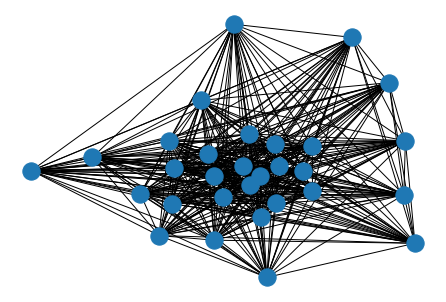

In [226]:
nx.draw_spring(G)

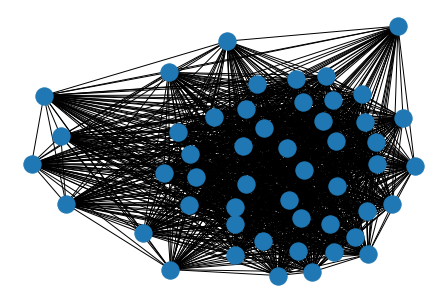

In [227]:
nx.draw_spring(newG)

In [228]:
tvd

,triangle,value
1876,"(Huskies_F2, Huskies_M1, Huskies_M3)",4.016484
1150,"(Huskies_D5, Huskies_F2, Huskies_M1)",3.483516
267,"(Huskies_D1, Huskies_M1, Huskies_M3)",3.368132
1024,"(Huskies_D4, Huskies_M1, Huskies_M3)",3.313187
1222,"(Huskies_D5, Huskies_M1, Huskies_M3)",3.302198
...,...,...
2233,"(Huskies_M12, Huskies_M8, Huskies_M9)",0.032967
2156,"(Huskies_G1, Huskies_M5, Huskies_M9)",0.032967
584,"(Huskies_D2, Huskies_M10, Huskies_M8)",0.027473
892,"(Huskies_D4, Huskies_D6, Huskies_M10)",0.021978


In [229]:
min(new_eigenvalue)

6.115384615384615

In [ ]:
len(tf)